In [3]:
# Importar a biblioteca para análise de dados Pandas e ler o banco de dados IMDB.
import pandas as pd

In [4]:
#Importar biblioteca de Processamento de Linguagem Natural
import nltk
from nltk import tokenize
from nltk.stem import PorterStemmer
from nltk import ngrams
from string import punctuation
# nltk.download()

In [5]:
# Algorítimos de Machine Learning e treinamento e testes da biblioteca de machine learning sklearn (SciKit-Learn)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# Nuvem de palavras
from wordcloud import WordCloud

In [7]:
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

In [9]:
imdb = pd.read_csv("imdb-reviews-pt-br.csv")
imdb.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [8]:
#Quantidade de avaliações positivas e negativas
imdb.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [10]:
#Converter as avaliações em binário
imdb['review_sentiment'] = imdb.sentiment.replace(['neg','pos'],[0,1])
imdb.head()
#imdb.tail()

,id,text_en,text_pt,sentiment,review_sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [5]:
#Dividir em dados de treino e dados de teste
#X_train, X_test, y_train, y_test = train_test_split(imdb.text_pt, imdb.sentiment, random_state=42)

In [ ]:
#logistic_regretion = LogisticRegression()
#logistic_regretion.fit(X_train, y_train)
#acc = logistic_regretion.score(X_test,y_test)
#print(acc)

In [10]:
reviews_pt = imdb.text_pt

In [11]:
#Para criar um modelo de aprendizado, criamos uma Bag of words com 100 palavras,
# vetorizamos e incluimos no algorítimo de aprendizado
vetorizar = CountVectorizer(max_features=100)
bag_of_words = vetorizar.fit_transform(reviews_pt)
# Após vetorização, gera uma matriz esparça
#bag_of_words_md
#len(vetorizar.get_feature_names())
# Após a vetorização, percebemos que a matriz esparça é muito grande, 
# o que pode comprometer o desempenho devido ao tamanho
#Usamos o parametro max_features, com as palavas que mais aparecem no corpus
print(type(bag_of_words))
print(bag_of_words.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(49459, 100)


In [16]:
#Imprimir a acurácia do modelo de aprendizado
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, imdb.review_sentiment , random_state=42)
logistic_regretion = LogisticRegression()
logistic_regretion.fit(X_train, y_train)
acc = logistic_regretion.score(X_test,y_test)
print(acc * 100)

71.19288313788921


In [11]:
def classificar_texto(corpus_textual_df, column_text, column_classification):
    vetorizar = CountVectorizer(max_features=100)
    bag_of_words = vetorizar.fit_transform(corpus_textual_df[column_text])
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, corpus_textual_df[column_classification] , random_state=42)
    logistic_regretion = LogisticRegression()
    logistic_regretion.fit(X_train, y_train)
    return logistic_regretion.score(X_test,y_test) * 100

In [13]:
print(classificar_texto(imdb, 'text_pt', 'review_sentiment'))

71.19288313788921


In [ ]:
#Trazer as palavras mais relevantes possíveis, para a lista das 100 mais citadas

In [38]:
#Utilizando world cloud
#pip install wordcloud

In [14]:
# Vetorizar as palavras do corpus
palavras = ' '.join([palavra for palavra in imdb['text_pt']])
len(palavras)

63448424

In [15]:
nuvem = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(palavras)

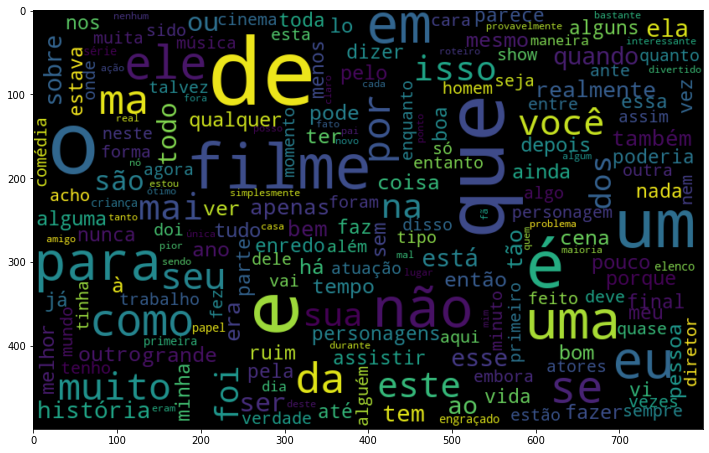

In [16]:
plt.figure(figsize=(12,8))
plt.imshow(nuvem, interpolation='bilinear')
plt.show()

In [12]:
def monta_nuvem(dataFrame, column_name):
    palavras = ' '.join([palavra for palavra in dataFrame[column_name]])
    nuvem = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(palavras)
    plt.figure(figsize=(12,8))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.show()

In [13]:
reviews_negativos = imdb.query('review_sentiment == 0')
reviews_positivos = imdb.query('review_sentiment == 1')

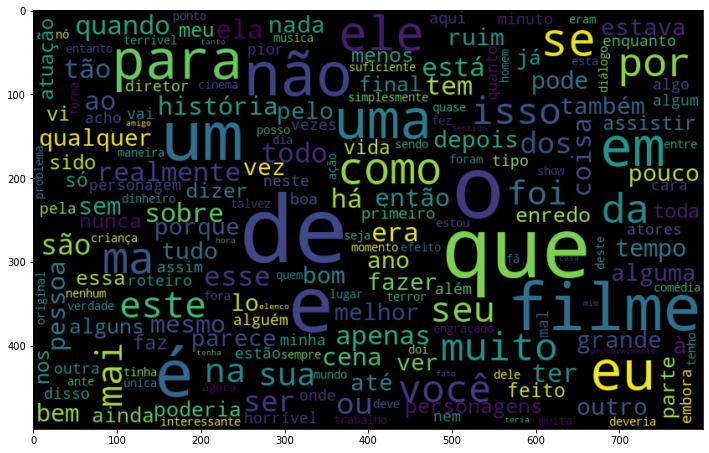

In [19]:
monta_nuvem(reviews_negativos, 'text_pt')

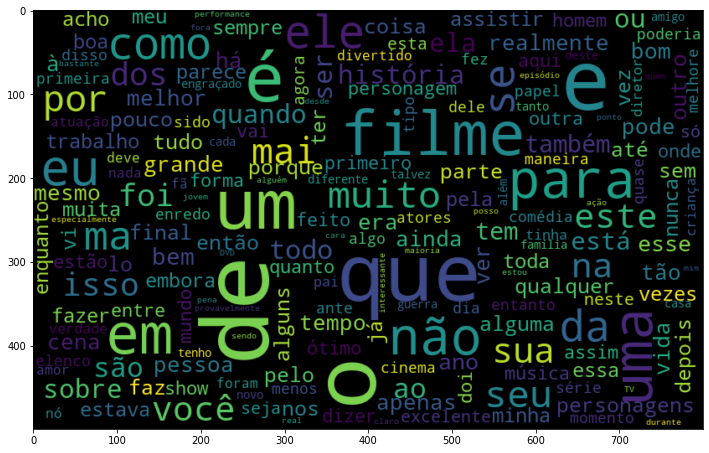

In [20]:
monta_nuvem(reviews_positivos, 'text_pt')

In [14]:
#Tokenizar os corpus
palavras = ' '.join([palavra for palavra in imdb['text_pt']])
token_whitespace = tokenize.WhitespaceTokenizer()
tokens = token_whitespace.tokenize(palavras) # nltk.word_tokenize(palavras)
tokens

['Mais',
 'uma',
 'vez,',
 'o',
 'Sr.',
 'Costner',
 'arrumou',
 'um',
 'filme',
 'por',
 'muito',
 'mais',
 'tempo',
 'do',
 'que',
 'o',
 'necessário.',
 'Além',
 'das',
 'terríveis',
 'seqüências',
 'de',
 'resgate',
 'no',
 'mar,',
 'das',
 'quais',
 'há',
 'muito',
 'poucas,',
 'eu',
 'simplesmente',
 'não',
 'me',
 'importei',
 'com',
 'nenhum',
 'dos',
 'personagens.',
 'A',
 'maioria',
 'de',
 'nós',
 'tem',
 'fantasmas',
 'no',
 'armário,',
 'e',
 'o',
 'personagem',
 'Costers',
 'é',
 'realizado',
 'logo',
 'no',
 'início,',
 'e',
 'depois',
 'esquecido',
 'até',
 'muito',
 'mais',
 'tarde,',
 'quando',
 'eu',
 'não',
 'me',
 'importava.',
 'O',
 'personagem',
 'com',
 'o',
 'qual',
 'deveríamos',
 'nos',
 'importar',
 'é',
 'muito',
 'arrogante',
 'e',
 'superconfiante,',
 'Ashton',
 'Kutcher.',
 'O',
 'problema',
 'é',
 'que',
 'ele',
 'sai',
 'como',
 'um',
 'garoto',
 'que',
 'pensa',
 'que',
 'é',
 'melhor',
 'do',
 'que',
 'qualquer',
 'outra',
 'pessoa',
 'ao',
 'seu',

In [15]:
freq = nltk.FreqDist(tokens)
freq.most_common(50)

[('de', 417651),
 ('que', 325070),
 ('e', 299743),
 ('o', 244881),
 ('um', 216410),
 ('a', 210179),
 ('é', 192381),
 ('em', 132778),
 ('uma', 130888),
 ('não', 127915),
 ('para', 126556),
 ('filme', 117543),
 ('do', 101737),
 ('com', 99174),
 ('como', 78361),
 ('os', 73766),
 ('se', 72245),
 ('eu', 68814),
 ('mas', 64788),
 ('da', 61901),
 ('por', 61339),
 ('no', 57145),
 ('mais', 53504),
 ('muito', 51761),
 ('Eu', 51485),
 ('você', 48811),
 ('ele', 47442),
 ('O', 44924),
 ('na', 44208),
 ('foi', 42207),
 ('dos', 41222),
 ('seu', 40460),
 ('as', 39292),
 ('sua', 36724),
 ('este', 34632),
 ('são', 34134),
 ('ser', 32696),
 ('ou', 32498),
 ('A', 31547),
 ('isso', 30528),
 ('-', 28767),
 ('sobre', 28626),
 ('está', 28057),
 ('filmes', 27619),
 ('eles', 26264),
 ('ao', 25526),
 ('tem', 24980),
 ('tão', 24790),
 ('realmente', 23673),
 ('era', 23353)]

In [23]:
df_frequencia = pd.DataFrame({'Word':list(freq.keys()), 'Frequency':list(freq.values())})
df_frequencia.head()

,Word,Frequency
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [24]:
top_10 = df_frequencia.nlargest(columns='Frequency', n=10)
top_10

,Word,Frequency
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


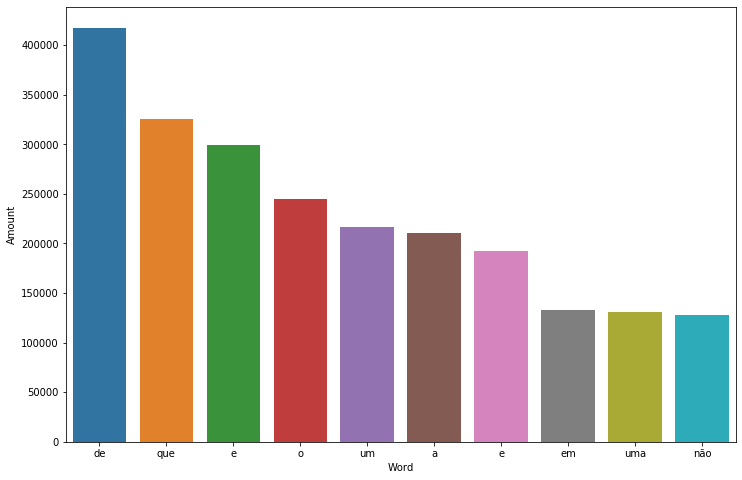

In [25]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_10, x='Word', y='Frequency')
ax.set(ylabel='Amount')
plt.show()

In [16]:
def grafico_barras(df_reviews, column_text, amount):
    words = ' '.join([word for word in df_reviews[column_text]])
    tokens = token_whitespace.tokenize(words) # nltk.word_tokenize(palavras)
    frequency = nltk.FreqDist(tokens)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = amount)
    total = df_frequency['Frequency'].sum()
    df_frequency['Percent'] = df_frequency['Frequency'].cumsum() / total * 100

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency")
    # ax2 = ax.twinx()
    # sns.lineplot(data=df_frequency, x='Word', y='Percent', color='red', sort=False, ax=ax2)
    ax.set(ylabel = "Amount of appearance")
    plt.show()


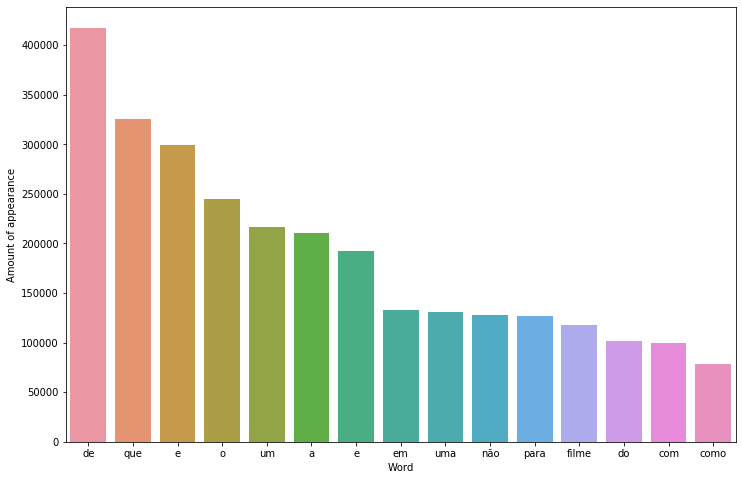

In [27]:
grafico_barras(imdb, 'text_pt', 15)

In [17]:
#Remover as stopwords das reviews
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
processed = []
for review in imdb.text_pt:
    new_phrase = []
    text = token_whitespace.tokenize(review)
    for word in text:
        if word not in palavras_irrelevantes:
            new_phrase.append(word)
    processed.append(' '.join(new_phrase))
imdb['treatment_1'] = processed

In [36]:
imdb.head(10)

,id,text_en,text_pt,sentiment,review_sentiment,treatment_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg,0,Uma coisa engraçada aconteceu comigo enquanto ...
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg,0,Este filme terror alemão ser estranhos vi. Eu ...
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg,0,"Sendo fã longa data cinema japonês, esperava i..."
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg,0,"""Tokyo Eyes"" fala menina japonesa 17 anos cai ..."
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,neg,0,Fazendeiros ricos Buenos Aires têm longa polít...


In [29]:
print(classificar_texto(imdb, 'treatment_1', 'review_sentiment'))

71.48402749696726


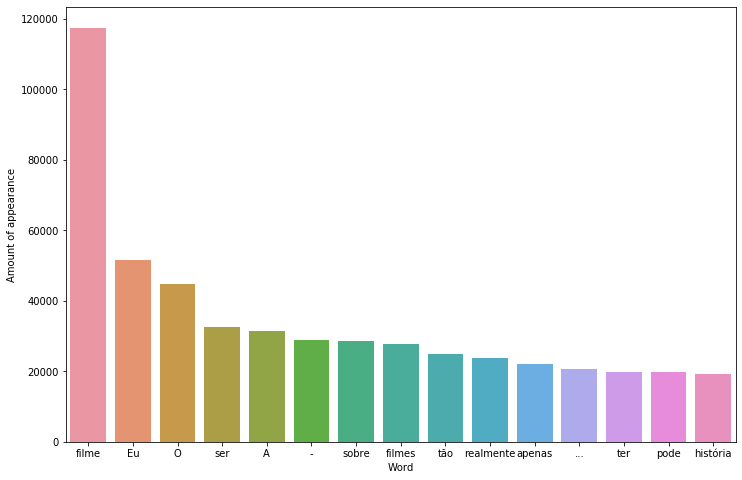

In [30]:
grafico_barras(imdb, 'treatment_1', 15)

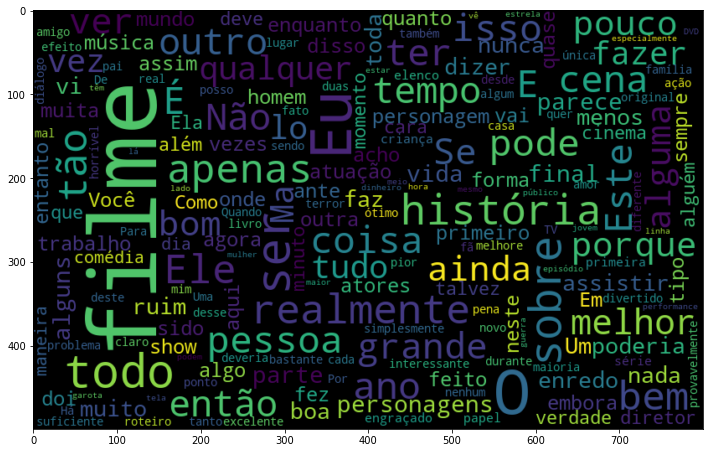

In [39]:
monta_nuvem(imdb,'treatment_1')

In [18]:
punct = [punct for punct in punctuation]
punct

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [19]:
palavras_irrelevantes += punct
palavras_irrelevantes

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [20]:
token_punkt = tokenize.WordPunctTokenizer()
processed = []
for review in imdb.text_pt:
    new_phrase = []
    text = token_punkt.tokenize(review)
    normalizada = [word.lower() for word in text if word.isalpha()]
    for word in normalizada:
        if (word not in palavras_irrelevantes):
            new_phrase.append(word)
    processed.append(' '.join(new_phrase))
imdb['treatment_1'] = processed

In [34]:
imdb['treatment_1'].head()

0    vez sr costner arrumou filme tempo necessário ...
1    exemplo motivo maioria filmes ação mesmos gené...
2    primeiro tudo odeio raps imbecis poderiam agir...
3    beatles puderam escrever músicas todos gostass...
4    filmes fotos latão palavra apropriada verdade ...
Name: treatment_1, dtype: object

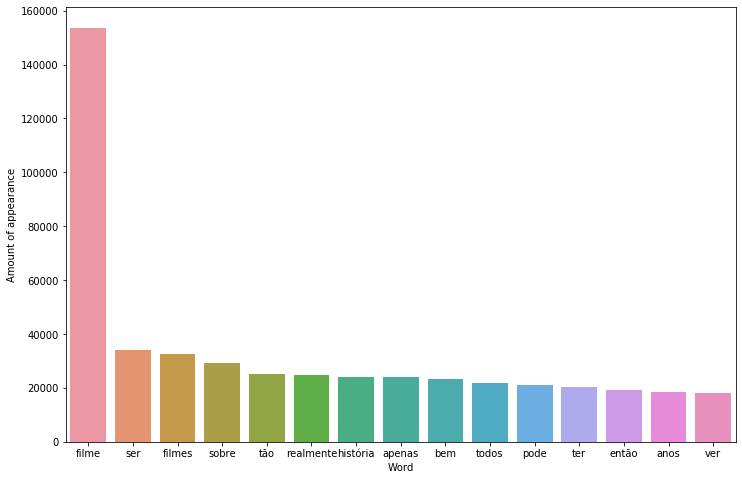

In [43]:
grafico_barras(imdb, 'treatment_1', 15)

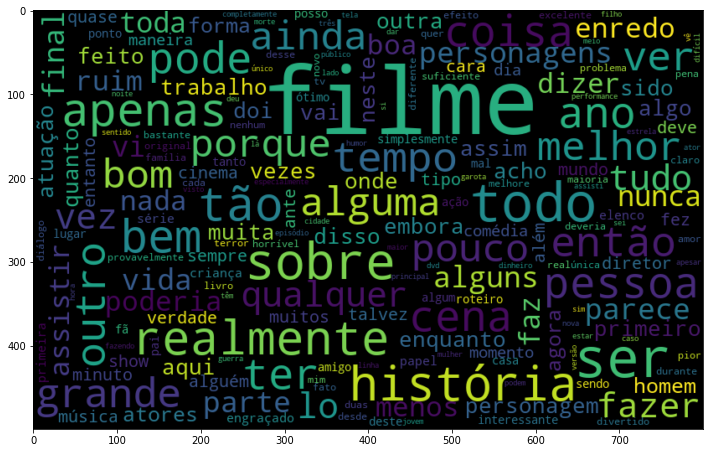

In [97]:
monta_nuvem(imdb, 'treatment_1')

In [35]:
classificar_texto(imdb,'treatment_1','review_sentiment')

71.5002021835827

In [44]:
reviews_negativos = imdb.query('review_sentiment == 0')
reviews_positivos = imdb.query('review_sentiment == 1')

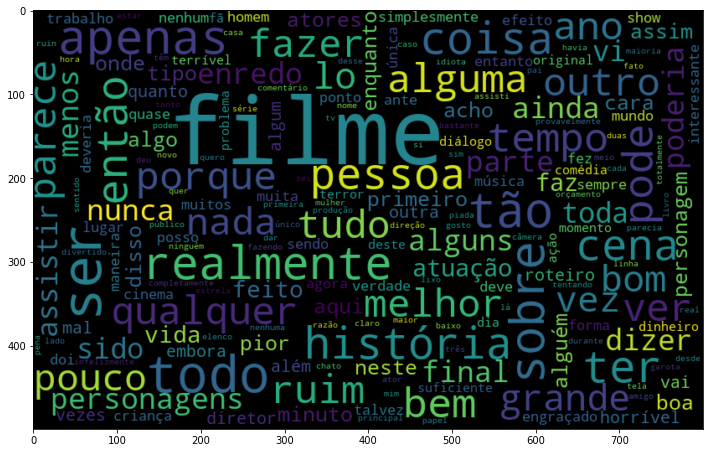

In [46]:
monta_nuvem(reviews_negativos, 'treatment_1')

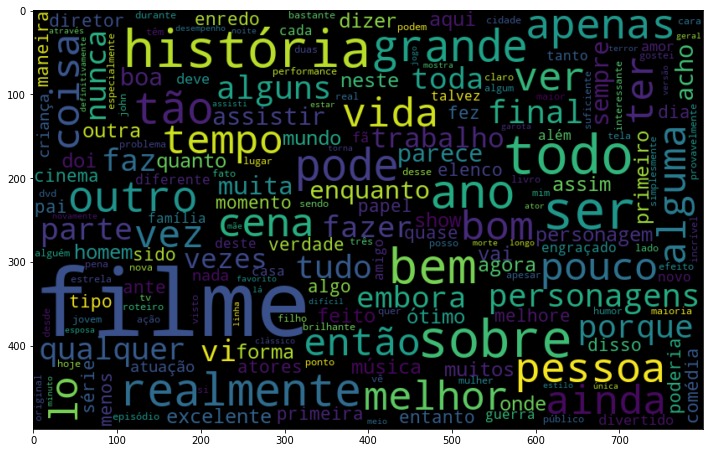

In [47]:
monta_nuvem(reviews_positivos, 'treatment_1')

In [21]:
stemmer = nltk.RSLPStemmer() # Portugues
# PorterStemmer # English
stemmer.stem('corredor')

'corr'

In [22]:
def stem_coluna(df_review, column_text):
    stemmer = nltk.RSLPStemmer()
    token_punkt = tokenize.WordPunctTokenizer()
    processed = list()
    for row in df_review[column_text]:
        phrase = []
        tokenized_row = token_punkt.tokenize(row)
        for word in tokenized_row:
            phrase.append(stemmer.stem(word))
        processed.append(' '.join(phrase))
    return processed

In [59]:
coluna = stem_coluna(imdb, 'treatment_1')

In [60]:
coluna[0]

'vez sr costn arrum film temp necess além terr seqü resgat mar qual pouc simples import nenhum person maior fantasm armári person cost realiz log iníci esquec tard import person dev import arrog superconfi ashton kutch problem sai garot pens melhor qualqu outr pesso redor mostr sinal armári desorden únic obstácul parec est venc costn final bem além mei caminh costn cont sobr fantasm kutch inform kutch lev ser melhor pressent pressági anteri nenhum mágic aqu tud pod faz deslig hor'

In [61]:
imdb['review_stem'] = coluna
imdb.head()

,id,text_en,text_pt,sentiment,review_sentiment,treatment_1,review_stem
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,vez sr costner arrumou filme tempo necessário ...,vez sr costn arrum film temp necess além terr ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exemplo motivo maioria filmes ação mesmos gené...,exempl motiv maior film açã mesm genér chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatles puderam escrever músicas todos gostass...,beatl pud escrev músic tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes fotos latão palavra apropriada verdade ...,film fot lat palavr apropri verdad tant ous qu...


In [ ]:
#TF - IDF (Frequência dos termos e Inverso da frequência do documento)
#TF-IDF é uma pontuação proporcional à frequência da palavra no texto e equilibrada pela frequência no corpus, 
# palavras que se repetem muito pontuações menores.

In [71]:
#TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=False)

In [75]:
vetor = tfidf.fit_transform(imdb['treatment_1']) # tfidf.fit_transform(imdb['review_stem'])

X_train, X_test, y_train, y_test = train_test_split(vetor, 
                                                    imdb['review_sentiment'], 
                                                    random_state = 42)
logistic_regretion = LogisticRegression()
logistic_regretion.fit(X_train, y_train)
print(logistic_regretion.score(X_test,y_test)*100)

88.12778002426202


In [23]:
# Ngrams - Forma de agrupar os termos, com a finalidade de dar mais sentido
# Ngrams é um método de otimizar o resultado. Pode aumentar o tamanho da Bag of Words, o que também faz com que o custo computacional aumente.
tfidf_ngrams = TfidfVectorizer(lowercase=False, ngram_range=(1,2)) #Palavra única, ou grupo de duas palavras.

In [25]:
vetor = tfidf_ngrams.fit_transform(imdb['treatment_1']) # tfidf_ngrams.fit_transform(imdb['review_stem'])
X_train, X_test, y_train, y_test = train_test_split(vetor, 
                                                    imdb['review_sentiment'], 
                                                    random_state = 42)
logistic_regretion = LogisticRegression()
logistic_regretion.fit(X_train, y_train)
print(logistic_regretion.score(X_test,y_test)*100)

88.24909017387789


In [26]:
pontuacao = pd.DataFrame(
    logistic_regretion.coef_[0].T,
    index = tfidf_ngrams.get_feature_names()
)

In [27]:
pontuacao.nlargest(10,0)

,0
excelente,8.389596
ótimo,8.007349
incrível,6.833109
melhores,4.944914
divertido,4.829628
gostei,4.679136
hoje,4.660657
brilhante,4.602137
perfeito,4.543944
definitivamente,4.349663


In [28]:
pontuacao.nsmallest(10,0)

,0
ruim,-11.347070
pior,-11.139207
horrível,-9.617612
nada,-8.188656
terrível,-7.898056
mal,-6.505479
chato,-6.269414
piores,-5.995271
minutos,-5.874320
lixo,-5.789230
